In [2]:
# 드라이브 연동
# cd 딥러닝 폴더 경로 이동
%cd "/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning"


/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning


#### 목표
- 폐암수술 환자 데이터를 통해 생존을 예측하는 분류모델을 만들어보자
- 다층 퍼셉트론(인공신경망)을 이용하여 이진 분류 문제를 해결해보자

- 데이터 불러오기

In [4]:
# 환경세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tf 뼈대 구축
from tensorflow.keras import Sequential
# tf 층 정의, 활성화 함수
from tensorflow.keras.layers import Dense, Activation
# 훈련셋, 테스트셋 분리 함수
from sklearn.model_selection import train_test_split

In [6]:
# header(컬럼) 정보 X
# 인덱스 번호로 컬럼이 설정되게 하기
data = pd.read_csv('./data/ThoraricSurgery.csv', header=None)
data.head()

# 컬럼명 정보 생략된 상황 -> 설명
# 앞 17개 컬럼 : 문제 데이터 (X,특성, 피처, feature, 독립변수, 설명변수)
# 마지막 컬럼 : 답 데이터(y, 라벨, 레이블, label, 종속변수, 반응변수, 타겟, target)
# 특성 정보 : 종양의 유형, 폐활량, 고통정도, 기침 등 환자 상태 정보
# 0-사망, 1-생존

# 결측치 확인, 데이터 타입 - 문자열x (문자->수치로 바꿀 필요X. encoding 필요X)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


- 데이터 정리
  - 1. 문제와 답 분리(열 분리)
  - 2. 훈련세트와 테스트셋트(행 분리)
    - train_test_split()
    - 비율 7:3
    - 랜덤고정 5
    - 크기확인 shape

In [ ]:
# 1. X,y
# 2. X_train, X_test, y_train, y_test
# 크기 확인

In [16]:
# 행은 모든 행이 필요함. : 쓰기, 열에 접근할거라서 loc 씀.
X = data.iloc[:,0:17]
# X = data.loc[:,0:16] # 끝 >눈에 보이는 label 이름 포함함
y = data.iloc[:,17] # -1
print(X.shape, y.shape)

# 2. X_train, X_test, y_train, y_test
# 크기확인
X_train, X_test, y_train, y_test = train_test_split(문제, 답, 분리비율, 랜덤)

(470, 17) (470,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# X_train.head(3)
print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제:', X_test.shape)
print('테스트답:', y_test.shape)

훈련문제: (329, 17)
훈련답: (329,)
테스트문제: (141, 17)
테스트답: (141,)


In [21]:
# 클래스 개수 확인
# 0, 이진분류
# 데이터를 다시 확인해보자!
np.unique(y_train, return_counts=True)
# 다양성이 보장되는 데이터인가요? No! 데이터 편향적인 편
# 0에 대해서는 학습이 잘 되겠지만, 1에 대해서는 학습이 잘 안될 수 있음.

(array([0, 1]), array([281,  48]))

- keras 활용하여 딥러닝 신경망 구축!
  - 1. 모델 설계: 골격(뼈대) + 층 내용 정의
  - 2. 컴파일(compile): 학습 + 평가 방법 설정
  - 3. 학습(fit): 학습 및 시각화
  - 4. 모델 예측(predict) 및 평가(evaluate)

In [25]:
# 특성의 개수 몇개일까?
ft_size = X_train.shape[1]
ft_size

# 이진분류 해결 - class 2개
# 출력층에서 정의하는 방법

17

In [ ]:
# binary_model = 객체 생성

In [26]:
binary_model = Sequential()

# 층 내용 정의
# 입력층 + 중간층1
# input_dim = 특성의 개수만큼
# units(중간층 퍼셉트론 개수) = 정답x (모델 성능확인했을 때 결과를 보면서 판단)
# Activation => Dense(units=, input_dim= , activation='sigmoid')
binary_model.add(Dense(units=10, input_dim=ft_size, activation='sigmoid'))

# 중간층(여러개)
binary_model.add(Dense(units=5, activation='sigmoid'))
binary_model.add(Dense(units=3, activation='sigmoid'))

# 출력층의 규칙
# 회귀 units=1, activation='linear'
# 이진분류 units=1, activation='sigmoid'
binary_model.add(Dense(units=1, activation='sigmoid'))

# 모델 정보 요약
binary_model.summary()

# Param 한개의 퍼셉트론층에서 가질 수 있는 w,b의 총 개수
# Param 개수를 확인하면서 모델의 복잡도를 파악할 수 있음
# 상대적인 개념
# 같은 문제를 해결하는 모델이 있을 때, 80개 vs 257개
# 성능이 비슷한 상황에서 가볍고 단순한 모델이 더 좋은 모델이라고 판단!

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2. 학습/평가 방법 설정
# 컴파일
# 회귀 : loss='mse', optimizer='sgd'(확률적 경사 하강법)
# 이진분류 : loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy','...','...']

In [29]:
binary_model.compile(loss='binary_crossentropy',
                     optimizer='sgd', # 최적화함수 : 최적의 가중치 w,b를 찾아주는 (갱신하는) 역할
                     metrics=['accuracy'])

In [ ]:
# 3. 학습
# fit(문제, 답, 반복횟수=100)
# 학습현황 h 변수 담아주기!
# 에포크

In [31]:
h = binary_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8359 - loss: 0.4480 
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.4065 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.4148 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4675 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8303 - loss: 0.4558 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: 0.3587 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8464 - loss: 0.4312 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4555  
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.4190 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.4795 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.4023 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
# 선그래프로 학습 현황 시각화
# accuracy, loss(오차)
# 반비례하는 선그래프 그려지겠군.


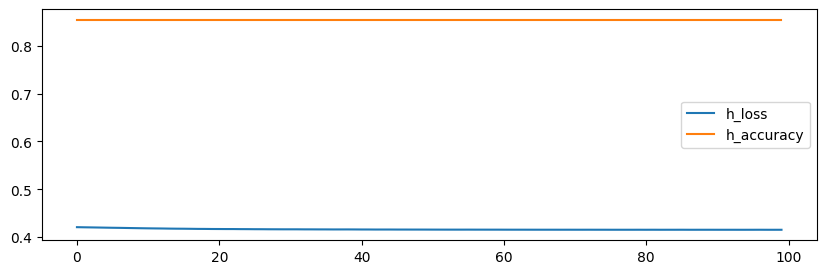

In [35]:
h.history.keys()
h_loss = h.history['loss']
h_acc = h.history['accuracy']
plt.figure(figsize=(10,3)) # x축, y축 크기
# 선그래프 그리기
plt.plot(h_loss, label='h_loss') # range(1,101)은 생략해도 됨.
plt.plot(h_acc, label='h_accuracy') # 상동
plt.legend() # 범례출력
plt.show() # 그림 출력

In [ ]:
# 모델의 성능을 더 올리고 싶으면 어떤 노력이 필요한가?
# 1.모델 측면 : 유닛(층, 내용)을 변경, 다른 사람이 학습시킨 모델 사용(전이학습),
#               최적화함수 변경(w,b를 바꿔보는 것), 중간층 활성화 함수 변경
# 2.데이터 측면 : 전처리(데이터 스케일 맞춰주기), 추가

In [36]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
26,210,2,2.80,1.60,1,0,1,0,1,1,12,0,0,0,1,0,53
358,410,3,2.64,2.15,0,0,0,0,0,0,11,0,0,0,1,0,59


In [ ]:
# 모델 평가

In [ ]:
# 모델 예측

In [ ]:
# 모델 분류 리포트 확인